# TP3: Clase 4

### Para la imagen suministrada implementar un algoritmo que:

1 - Encuentre la posición de los iris en cada
par de ojos y mida su distancia en
píxeles.

In [1]:
# Se importan las librerias a utilizar
import os
import sys
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join('../../utils'))
sys.path.append(module_path)

In [2]:
# Se convierte a escala de grises
def convert_gray(img):
    return cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [3]:
# Convertir imagenes de BGR a RGB
def convert_RGB(img):
    return cv.cvtColor(img, cv.COLOR_BGR2RGB)

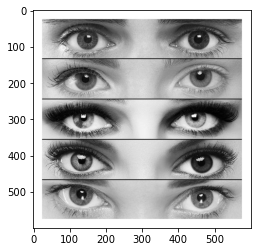

In [24]:
# Se carga la imagen
img = cv.imread('tp3_images/eyes.jpg')
img = convert_gray(img)
plt.imshow(img, cmap='gray')


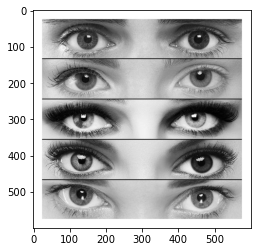

In [25]:
# Se suaviza la imagen 
img_b = cv.medianBlur(img, 5)
plt.imshow(img, cmap='gray')

In [38]:
# Se obtienen los circulos por transformada de Hough
img_out = img_b.copy()
circles = cv.HoughCircles(
    image=img_b,
    method=cv.HOUGH_GRADIENT,
    dp=1, 
    minDist=10,
    param1=90,
    param2=21, 
    minRadius=25, 
    maxRadius=35
)

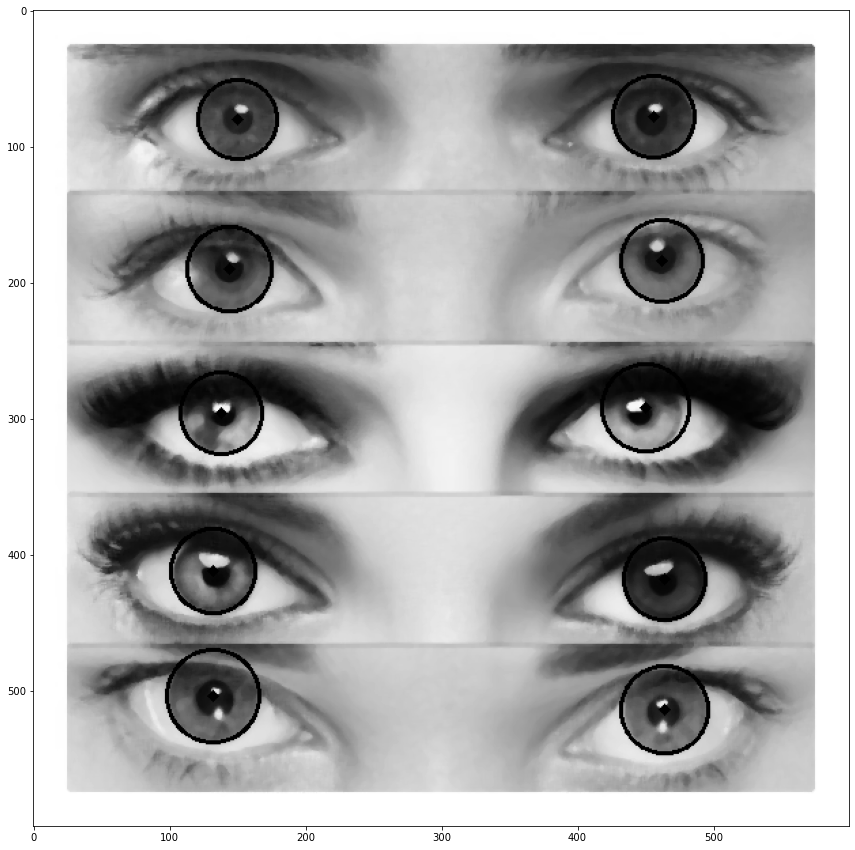

In [39]:
# Se grafican los circulos
circles = np.uint16(np.around(circles))
for i in circles[0, :]:
    # Dibujamos el círculo externo
    cv.circle(img_out, (i[0], i[1]), i[2], (0, 255, 0), 2)
    # Dibujamos el centro del círculo
    cv.circle(img_out, (i[0], i[1]), 2, (0, 0, 255), 3)

plt.figure(figsize=(15, 15))
plt.imshow(img_out, cmap='gray')

In [40]:
# Se calcula el histograma con las direcciones de maxima magnitud
number_eyes = 5 
bins = [i * img.shape[1] / number_eyes for i in range(number_eyes + 1)]
line = np.digitize(circles[:, :, 1], bins, right=False)

for i in np.unique(line):
    print(f"Ojos número {i}, posición de los ojos en la imagen: ")
    eyes_cycles = circles[line == i]
    print("Posición ojo 1: {}".format(eyes_cycles[0, :2]))
    print("Posición ojo 2: {}".format(eyes_cycles[1, :2]))
    print("Distancia entre los ojos: {}\n".format(abs(int(eyes_cycles[0, 0]) - int(eyes_cycles[1, 0]))))

Ojos número 1, posición de los ojos en la imagen: 
Posición ojo 1: [456  78]
Posición ojo 2: [150  80]
Distancia entre los ojos: 306

Ojos número 2, posición de los ojos en la imagen: 
Posición ojo 1: [144 190]
Posición ojo 2: [462 184]
Distancia entre los ojos: 318

Ojos número 3, posición de los ojos en la imagen: 
Posición ojo 1: [138 296]
Posición ojo 2: [450 292]
Distancia entre los ojos: 312

Ojos número 4, posición de los ojos en la imagen: 
Posición ojo 1: [464 418]
Posición ojo 2: [132 412]
Distancia entre los ojos: 332

Ojos número 5, posición de los ojos en la imagen: 
Posición ojo 1: [132 504]
Posición ojo 2: [464 514]
Distancia entre los ojos: 332



2 - Encuentre la posición de las pupilas en
cada par de ojos y mida su distancia en
píxeles.

In [29]:
# Se hace un filtrado
img_blur = cv.medianBlur(img, 7)

In [35]:
# Se obtienen los circulos por transformada de Hough
img_out = img_blur.copy()
circles = cv.HoughCircles(
    image=img_blur,
    method=cv.HOUGH_GRADIENT,
    dp=1, 
    minDist=50,
    param1=120,
    param2=10, 
    minRadius=11, 
    maxRadius=13
)

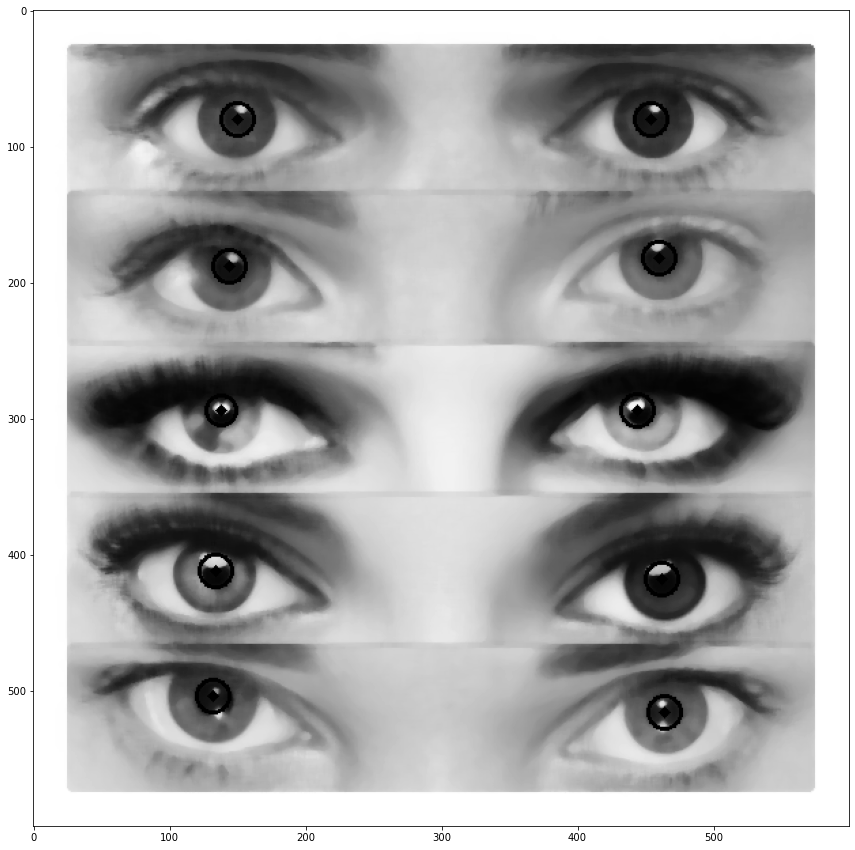

In [36]:

# Se grafican los circulos
circles = np.uint16(np.around(circles))
for i in circles[0, :]:
    # Dibujamos el círculo externo
    cv.circle(img_out, (i[0], i[1]), i[2], (0, 255, 0), 2)
    # Dibujamos el centro del círculo
    cv.circle(img_out, (i[0], i[1]), 2, (0, 0, 255), 3)

plt.figure(figsize=(15, 15))
plt.imshow(img_out, cmap='gray')

In [37]:
# Se calcula el histograma con las direcciones de maxima magnitud
number_eyes = 5 
bins = [i * img.shape[1] / number_eyes for i in range(number_eyes + 1)]
line = np.digitize(circles[:, :, 1], bins, right=False)

for i in np.unique(line):
    print(f"Ojos número {i}, posición de los ojos en la imagen: ")
    eyes_cycles = circles[line == i]
    print("Posición ojo 1: {}".format(eyes_cycles[0, :2]))
    print("Posición ojo 2: {}".format(eyes_cycles[1, :2]))
    print("Distancia entre los ojos: {}\n".format(abs(int(eyes_cycles[0, 0]) - int(eyes_cycles[1, 0]))))

Ojos número 1, posición de los ojos en la imagen: 
Posición ojo 1: [454  80]
Posición ojo 2: [150  80]
Distancia entre los ojos: 304

Ojos número 2, posición de los ojos en la imagen: 
Posición ojo 1: [460 182]
Posición ojo 2: [144 188]
Distancia entre los ojos: 316

Ojos número 3, posición de los ojos en la imagen: 
Posición ojo 1: [444 294]
Posición ojo 2: [138 294]
Distancia entre los ojos: 306

Ojos número 4, posición de los ojos en la imagen: 
Posición ojo 1: [462 418]
Posición ojo 2: [134 412]
Distancia entre los ojos: 328

Ojos número 5, posición de los ojos en la imagen: 
Posición ojo 1: [464 516]
Posición ojo 2: [132 504]
Distancia entre los ojos: 332

